In [1]:
from Inverse import *
from q_method import *

<AxesSubplot:>

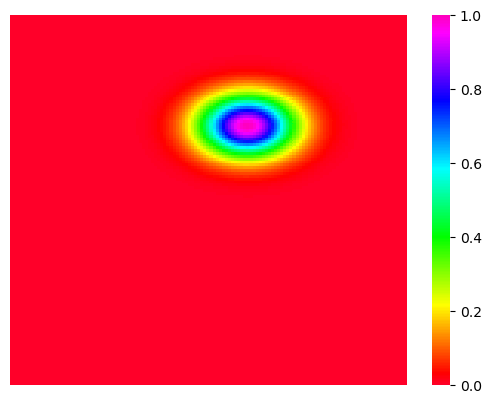

In [2]:
q = q_gen(128,'TEST')
sns.heatmap(q,**heatmap_params)

In [16]:
N_gen = 128
Q_gen = q_gen(N_gen,'TEST').reshape(-1)*0.1
N = 128
k_list = [10]
m = 1
noise_level = 0.0
_,x1,y1 = data_gen(Q_gen, N_gen, N, k_list, m, noise_level,5)

In [17]:
N_gen = 256
Q_gen = q_gen(N_gen,'TEST').reshape(-1)*0.1
N = 128
k_list = [10]
m = 1
noise_level = 0.0
_,x2,y2 = data_gen(Q_gen, N_gen, N, k_list, m, noise_level,5)

相对误差为0.20%


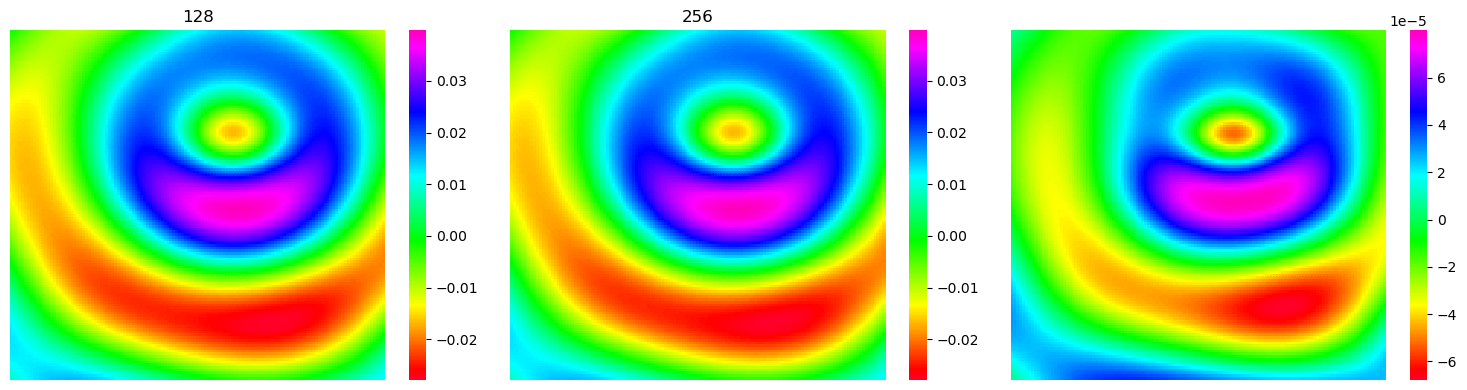

0.001816628265363938


In [18]:
heatmap_for_test(x1[0,0].real,x2[0,0].real,['128','256',''],loss = True)
print(Error(y1[0],y2[0]))

In [19]:
0.11496315907066819/1.08599

0.10586023726799343

In [22]:
import argparse
import re

output_filename = '/data/liuziyang/Programs/pde_solver/logs/output_k_TEST.log'
PROJECT_DIR = '/data/liuziyang/Programs/pde_solver/'

J_list = []
Find_Tnf = False
Tnf_list = []
Tit_list = []
tmp_filename = PROJECT_DIR + '.tmp.log'
for line in open(tmp_filename, "r", encoding='UTF-8'):
    search_ = re.findall('f=  .*? ', line)
    if Find_Tnf:
        T_tmp = re.findall(r'\d+', re.sub(r'\s+', ' ', line))
        print(T_tmp)
        Tit_list.append(int(T_tmp[1]))
        Tnf_list.append(int(T_tmp[2]))
    search_Tnf = re.findall('Tnf  Tnint', line)
    if len(search_Tnf) > 0:
        Find_Tnf = True
    else:
        Find_Tnf = False
    if len(search_) > 0:
        a = search_[0]
        J_list.append(eval(a[4:-5] + 'e' + a[-4:-1]))
start_id = 0
end_id = 0
J_output = []
for i in range(len(Tit_list)):
    end_id =  start_id + Tit_list[i] + 1
    J_tmp = J_list[start_id:end_id]
    J_tmp = [i / J_tmp[0] for i in J_tmp]
    start_id = end_id
    J_output += J_tmp
    
    
for line in open(output_filename, "r", encoding='UTF-8'):
    search_t_total = re.findall('t_total=.*?\n', line)
    if len(search_t_total) == 1:
        t_total_tmp = eval(search_t_total[0][8:-1])
        try:
            t_total_list = list(t_total_tmp)
        except:
            t_total_list = [t_total_tmp]
Tnf_str = ''
Tit_str = ''
t_avg_str = ''
for i in range(len(Tit_list)):
    Tnf_str += str(Tnf_list[i])[:5] + ','
    Tit_str += str(Tit_list[i])[:5] + ','
    t_avg_str += str(t_total_list[i]/Tnf_list[i])[:5] + ','

['12', '15', '1', '0', '0', '1', '424', '04', '1', '004', '02']
['10', '11', '1', '0', '0', '3', '767', '04', '1', '150', '01']


In [21]:
Tnf_list

[1, 1]

In [24]:
from tqdm import tqdm, trange

In [31]:
with tqdm(total = 10,file = open('kkk.log', 'a+')) as pbar:
    pbar.set_description('HH')
    for i in range(10):
        time.sleep(1)
        pbar.update(1)

In [32]:
!vim kkk.log

7[>4;2m="kkk.log" [noeol] 26L, 1647C▽  [>c]10;?]11;?^M  0%|| 0/10 [00:00<?, ?it/s]^[[A
^M  0%|| 0/10 [00:00<?, ?it/s]^[[A

^MHH:  60%|██████| 6/10 [00:06<00:04,  1.00s/it]^[[A1,0-1TopType  :qa  and press <Enter> to exit Vim1,0-1Top